# **K-Means Clustering Algorithm Task**
You have to apply k means clustering algorithm on the provided dataset. The output should have a cluster column at the last.                                                                                      


## **Part 1:**                                                             
You have to write algorithm of k-means clustering using only NumPy and pandas. You are not allowed to use any library for Part 1.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# Load dataset
def load_dataset():

    """
    Dataset Sample:

    Age	SiteSpending	SiteTime	RecommendImpression	Education	WorkType	      Gender	Salary
    32	314.06	      30.14	    0	                  Degree	  Private sector	Male	  60173.49
    """

    df = pd.read_excel('/salary_data.xlsx')

    return df

# Preprocess dataset: handle categorical variables and normalization
def preprocess_data(df):

    processed_df = df.copy()

    categorical_cols = ['Education', 'WorkType', 'Gender']

    # ONE HOT ENCODING
    processed_df = pd.get_dummies(processed_df, columns=categorical_cols, drop_first=True)
    # drop_first=True argument drops one column from each set of the resulting columns

    numeric_features = processed_df.select_dtypes(include=['float64', 'int64']).columns

    for feature in numeric_features:
        min_val = processed_df[feature].min()
        max_val = processed_df[feature].max()
        processed_df[feature] = (processed_df[feature] - min_val) / (max_val - min_val)
    # min() and max() are used to normalize the data to a range between 0 and 1 using the formula

    return processed_df

In [8]:
def kmeans_scratch(X, k, max_iters=100):

    if isinstance(X, pd.DataFrame):  # convert df to np arr
        X = X.values

    X = X.astype(np.float64)  # correct format (np.float64) for calculations
    n_samples, n_features = X.shape  # check no of data and features

    if np.isnan(X).any() or np.isinf(X).any():        # check for NaN or infinite values
        raise ValueError("Data has NaN or Infinity")

    # random choice with replace = False so that no multiple choices

    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]

    labels = np.zeros(n_samples) # cluster assignment for each record
    distances = np.zeros((n_samples, k)) # distances for each record

    for iteration in range(max_iters):
        old_centroids = centroids.copy()

        for i in range(k):
            distances[:, i] = np.sqrt(np.sum((X - centroids[i])**2, axis=1))
            # calculates the Euclidean distance to every data point and stores it in distances

        labels = np.argmin(distances, axis=1) # assigns each data point to the nearest centroid based on the calculated distances, updating labels

        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)  # mean calculated for clusters where values were assigned

        if np.all(old_centroids == centroids):
            break

    return labels, centroids

In [77]:
k = 4
max_iter = 500
df = load_dataset()
df_processed = preprocess_data(df)
labels, centroids = kmeans_scratch(df_processed, k)
df['Cluster'] = labels
print(df.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender    Salary  Cluster  
0    Male  60173.49        0  
1  Female  42965.45        1  
2    Male  54924.41        3  
3  Female  26734.99        0  
4    Male  15325.23        1  


## **Part 2:**

Implement this task using the libraries. Explore Libraries of K-mean clustering algorithm.

In [58]:
from sklearn.cluster import KMeans

In [78]:
df = load_dataset()
df_processed = preprocess_data(df)

# TODO:
# 1. Apply KMeans from sklearn using same k and maximum iterations
# 2. Get predicted labels
kmeans_sklearn = KMeans(n_clusters=k, max_iter=max_iter, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(df_processed)
centroids_sklearn = kmeans_sklearn.cluster_centers_


In [79]:
df['Cluster'] = labels
print(df.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender    Salary  Cluster  
0    Male  60173.49        0  
1  Female  42965.45        1  
2    Male  54924.41        3  
3  Female  26734.99        0  
4    Male  15325.23        1  


## **Part 3:** (Visualize for both part 1 and part 2)
Visualize the clusters using PCA (2D)

In [80]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [81]:
def visualize_clusters(X, labels, title):
    # Reduce dimensions to 2D using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a scatter plot
    plt.figure(figsize=(10, 7))

    # Plot each cluster with a different color
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

    for i, label in enumerate(unique_labels):
        plt.scatter(
            X_pca[labels == label, 0],
            X_pca[labels == label, 1],
            s=50,
            c=[colors[i]],
            label=f'Cluster {label}'
        )

    # Mark centroids if available in PCA space
    # Note: To show centroids properly, they would need to be transformed by the same PCA

    # Add labels and title
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

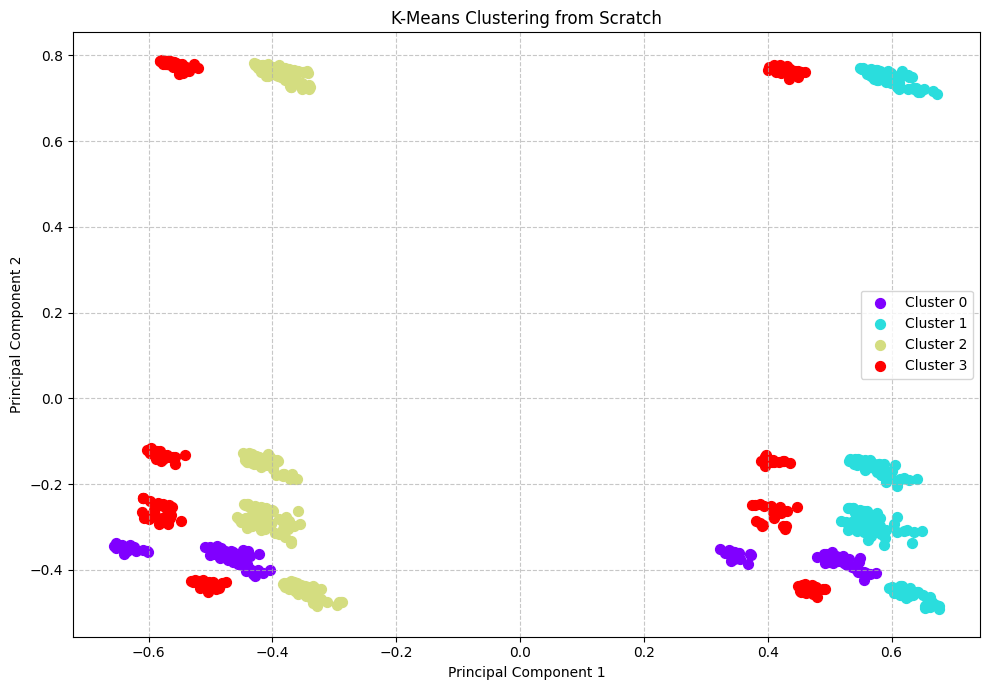

In [82]:
# Call this after scaling and predicting in Part 2
# visualize_clusters(scaled_data, labels, "K-Means Clustering Visualization")
df = load_dataset()
df_processed = preprocess_data(df)
labels_scratch, centroids_scratch = kmeans_scratch(df_processed, k)
visualize_clusters(df_processed, labels_scratch, "K-Means Clustering from Scratch")

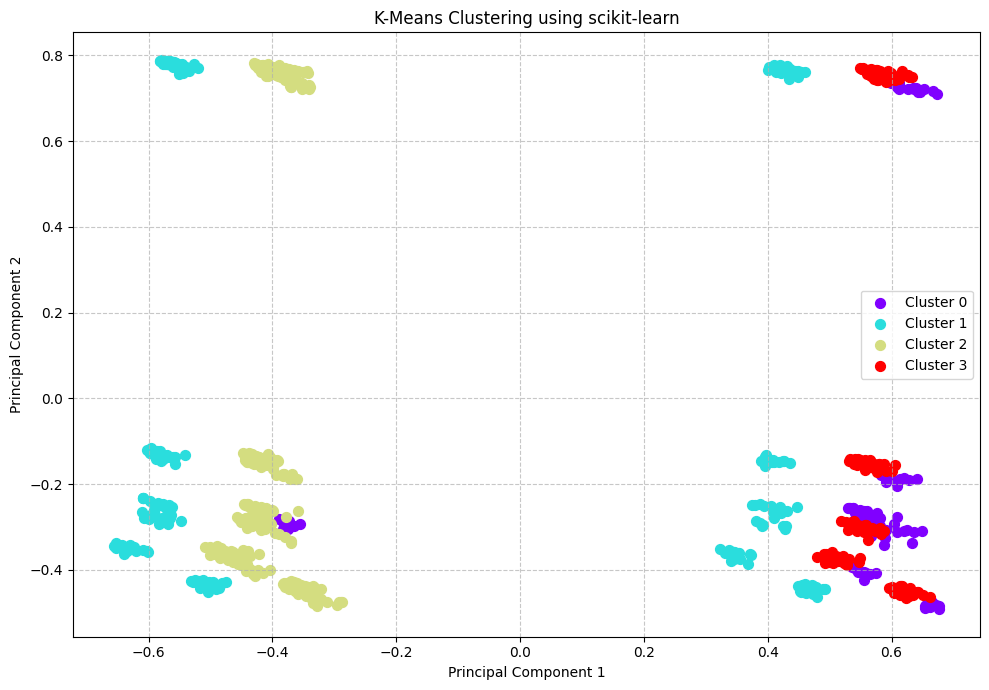

In [83]:
# Visualize results from Part 2 (sklearn)
labels_sklearn = kmeans_sklearn.fit_predict(df_processed)
visualize_clusters(df_processed, labels_sklearn, "K-Means Clustering using scikit-learn")